## Preparation

In [1]:
import pysd
from pathlib import Path
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl

### Determine Directory

In [2]:
vensimDirectory='./Simulation Files/Prosumers & defectors'
vensimFile ='net metering-no fixed tariff.mdl'
filepath = Path(vensimDirectory,vensimFile)
model = pysd.read_vensim(str(filepath))

In [3]:
outputVariableList = ['effect of remaining time on change in electricity tariff','tariff correction remaining time']

In [4]:
paramaters = {
    'population growth rate': 1.4**(1/240)-1,
    'time to adjust Prosumer Demand': 1,
    'time to adjust Regular Consumer demand': 1,
    'TIME STEP': 2**-10,
    'SAVEPER': 2**-4,
    'Tariff Correction Period': 12,
    'price elasticity of prosumers': -0.2,
    'price elasticity of regular consumers': -0.1,
    'Initial Electricity Tariff': 0.15,
    'PV Potential': 0.3,

}

result = model.run(params=paramaters, return_columns=outputVariableList)

In [5]:
    mpl.rc('lines', linewidth=1.5, markersize=4)
    mpl.rc('grid', linewidth=0.5, linestyle='--')
    mpl.rc('font', size=7, family='Times New Roman')
    mpl.rc('text',usetex=False)
    cm = 1/2.54
    mpl.rc('figure', figsize=(9*cm, 6*cm))


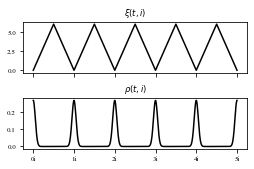

In [8]:
fig,ax=plt.subplots(2,1,sharex=True)
for i,c in enumerate(result.columns):
    ax[i].plot(result.loc[:60,c],c='k')
    ax[i].set_xticks([x for x in range(0,61,12)])
    ax[i].set_xticklabels([f'{x}i' for x in range(6)])

ax[0].set_title(r'$ \xi(t,i) $')
ax[1].set_title(r'$ \rho(t,i) $')
fig.tight_layout(h_pad=1)
plt.savefig('chart.pdf',bbox_inches='tight')

In [7]:
constants = variables.loc[variables["Type"]=='constant',['Real Name', 'Eqn','Unit']]
constants.loc[:,'Eqn']=constants.loc[:,'Eqn'].apply(lambda x: str(x)[2:-1])
constants.loc[:,'Unit']=constants.loc[:,'Unit'].apply(lambda x: str(x)[2:-1])
constants.columns=['Parameter','Value','Unit']
print(constants)

NameError: name 'variables' is not defined